# DATASCIENCE INTERNSHIP

##                           BHARAT INTERN

###        TASK 1 : STOCK PRICE PREDICTION (GOOGLE) 
####                          by Pratham Priyanshu Mohanty 

### OBJECTIVE :-A MODEL which predicts the stock price of a company ,here Google using LSTM.



### INTRODUCTION:-
 
  This dataset contains historical data of Google's stock prices and related attributes. It consists of 14       columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains   the corresponding values for that attribute.

  The columns in the dataset are as follows:

  1)Symbol: The name of the company, which is GOOG in this case.
  
  2)Date: The year and date of the stock data.
  
  3)Close: The closing price of Google's stock on a particular day.
  
  4)High: The highest value reached by Google's stock on the given day.
  
  5)Low: The lowest value reached by Google's stock on the given day.
  
  6)Open: The opening value of Google's stock on the given day.
  
  7)Volume: The trading volume of Google's stock on the given day, i.e., the number of shares traded.
  
  8)adjClose: The adjusted closing price of Google's stock, considering factors such as dividends and stock         splits.
  
  9)adjHigh: The adjusted highest value reached by Google's stock on the given day.
  
 10)adjLow: The adjusted lowest value reached by Google's stock on the given day.
 
 11)adjOpen: The adjusted opening value of Google's stock on the given day.
 
 12)adjVolume: The adjusted trading volume of Google's stock on the given day, accounting for factors such as      stock splits.
 
 13)divCash: The amount of cash dividend paid out to shareholders on the given day.
 
 14)splitFactor: The split factor, if any, applied to Google's stock on the given day. A split factor of 1        indicates no split.
 

### THE DATASET IS TAKEN FROM KAGGLE
                https://www.kaggle.com/datasets/varpit94/google-stock-data
                  
## STEP 1: Problem understanding by looking at the objective we need to achieve

Here in this case study and dataset taken from kaggle, we need to complete the analysis of what are the stock price predictions of the Google in the next years as per the current scenerios. 





## STEP 2: Loading the dataset and importing various libraries


In [75]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
df = pd.read_csv('/home/pratham2810/Documents/PROJECTS/Stock_Price_prediction_DS-ML/google_stock.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0.0,1.0


## STEP-3: Getting the insights and informations about the data

In [76]:
# shape of data
print("Shape of data:",df.shape)

# statistical description of data
df.describe()

Shape of data: (1258, 14)


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [77]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [78]:
# checking null values
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

THERE are no null values of the dataset

In [80]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


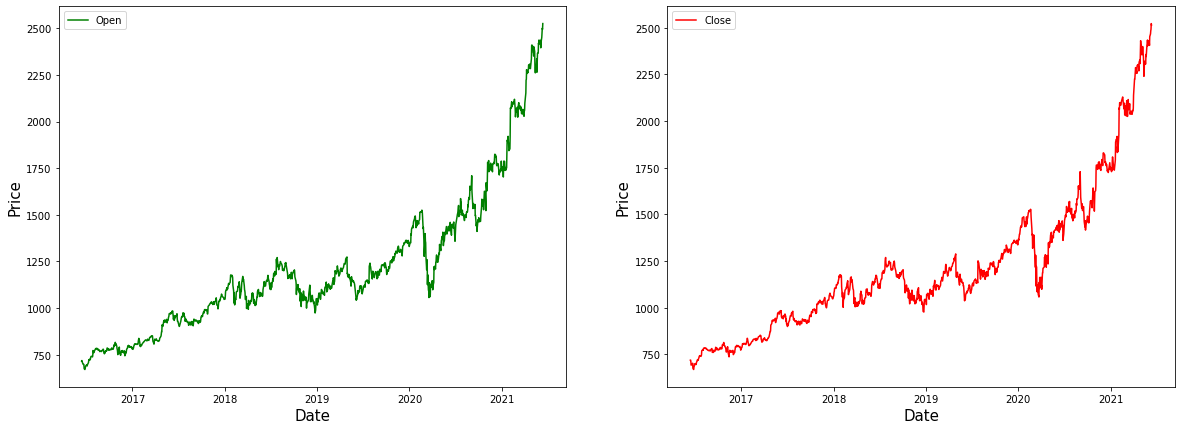

In [82]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

## STEP 4 : DATA PRE-PROCESSING

In [83]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [86]:
# splitting the data into training and test set
training_size = round(len(df) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [87]:

train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [88]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

## STEP 4 : CREATING LSTM MODEL

In [51]:
#importing libraries for lstm model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional


In [89]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 50, 50)            10600     
                                                                 
 dropout_12 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_27 (LSTM)              (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


2023-07-10 22:17:24.991771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 22:17:24.992824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 22:17:24.993982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [90]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100


2023-07-10 22:18:01.643586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 22:18:01.645224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 22:18:01.646227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/30 [============================>.] - ETA: 0s - loss: 0.0101 - mean_absolute_error: 0.0728

2023-07-10 22:18:04.813094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 22:18:04.814434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 22:18:04.815517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 4s 53ms/step - loss: 0.0098 - mean_absolute_error: 0.0716 - val_loss: 0.0169 - val_mean_absolute_error: 0.1145
Epoch 2/100
30/30 [==============================] - 1s 41ms/step - loss: 0.0012 - mean_absolute_error: 0.0281 - val_loss: 0.0051 - val_mean_absolute_error: 0.0594
Epoch 3/100
30/30 [==============================] - 1s 43ms/step - loss: 5.7460e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0017 - val_mean_absolute_error: 0.0345
Epoch 4/100
30/30 [==============================] - 1s 39ms/step - loss: 5.2856e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0014 - val_mean_absolute_error: 0.0307
Epoch 5/100
30/30 [==============================] - 1s 39ms/step - loss: 5.1019e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0013 - val_mean_absolute_error: 0.0302
Epoch 6/100
30/30 [==============================] - 1s 36ms/step - loss: 4.8595e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0015 - val_mean_absolute_error: 0.0308
Epoch 7/100


30/30 [==============================] - 1s 39ms/step - loss: 2.1015e-04 - mean_absolute_error: 0.0106 - val_loss: 0.0028 - val_mean_absolute_error: 0.0444
Epoch 50/100
30/30 [==============================] - 1s 41ms/step - loss: 1.9019e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0032 - val_mean_absolute_error: 0.0489
Epoch 51/100
30/30 [==============================] - 1s 40ms/step - loss: 1.9021e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0023 - val_mean_absolute_error: 0.0401
Epoch 52/100
30/30 [==============================] - 1s 44ms/step - loss: 2.0775e-04 - mean_absolute_error: 0.0104 - val_loss: 6.3349e-04 - val_mean_absolute_error: 0.0188
Epoch 53/100
30/30 [==============================] - 1s 41ms/step - loss: 2.0630e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0016 - val_mean_absolute_error: 0.0329
Epoch 54/100
30/30 [==============================] - 1s 29ms/step - loss: 1.7573e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0028 - val_mean_absolute_error: 0.

30/30 [==============================] - 1s 44ms/step - loss: 1.2234e-04 - mean_absolute_error: 0.0078 - val_loss: 0.0021 - val_mean_absolute_error: 0.0375
Epoch 98/100
30/30 [==============================] - 1s 44ms/step - loss: 1.1331e-04 - mean_absolute_error: 0.0075 - val_loss: 0.0043 - val_mean_absolute_error: 0.0561
Epoch 99/100
30/30 [==============================] - 1s 44ms/step - loss: 1.1020e-04 - mean_absolute_error: 0.0076 - val_loss: 0.0036 - val_mean_absolute_error: 0.0504
Epoch 100/100
30/30 [==============================] - 1s 48ms/step - loss: 1.2033e-04 - mean_absolute_error: 0.0079 - val_loss: 0.0033 - val_mean_absolute_error: 0.0479


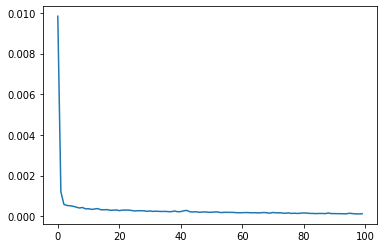

In [91]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [92]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

2023-07-10 22:21:03.446361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 22:21:03.447993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 22:21:03.449107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 1s 16ms/step


array([[0.48190805, 0.48034543],
       [0.48703244, 0.48544356],
       [0.49292126, 0.4908724 ],
       [0.51299703, 0.50944096],
       [0.52218145, 0.51909107]], dtype=float32)

In [93]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1564.419 , 1558.5034],
       [1573.9192, 1567.9519],
       [1584.8365, 1578.0134],
       [1622.0554, 1612.4274],
       [1639.0826, 1630.3123]], dtype=float32)

### STEP 5 : VISUALIZING ACTUAL VS PREDICTED DATA


In [96]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-202:].index)], axis=1)


# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1564.418945,1558.503418
2020-08-25,1582.07,1608.22,1573.919189,1567.951904
2020-08-26,1608.00,1652.38,1584.836548,1578.013428
2020-08-27,1653.68,1634.33,1622.055420,1612.427368
2020-08-28,1633.49,1644.41,1639.082642,1630.312256


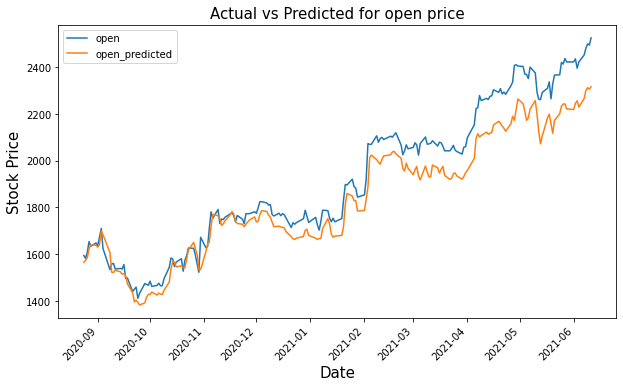

In [97]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

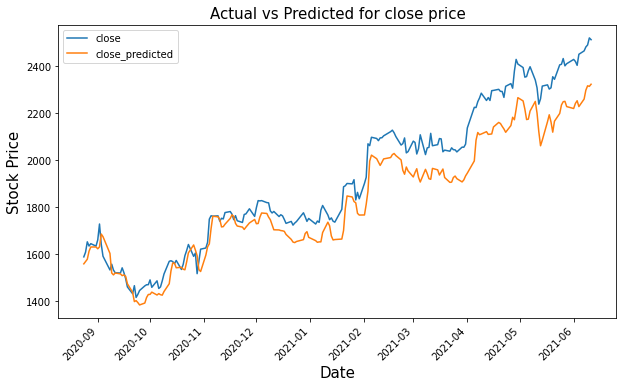

In [98]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP-7:PREDICTING UPCOMING 15 DAYS

In [119]:
# Creating a dataframe and adding 3 days to existing index 

df_merge['2021-06-09':'2021-06-12']


,open,close,open_predicted,close_predicted
date,,,,
2021-06-09,2499.50,2491.40,2311.954834,2317.365234
2021-06-10,2494.01,2521.60,2305.802490,2314.993652
2021-06-11,2524.92,2513.93,2316.094482,2324.075439


In [104]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [105]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 21ms/step


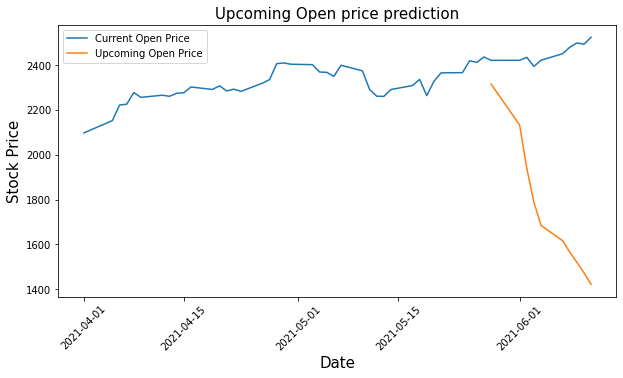

In [106]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

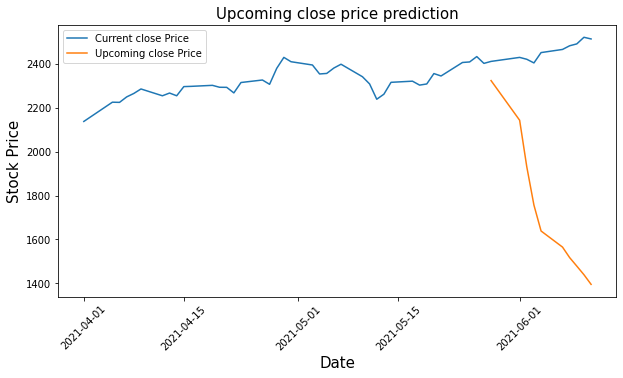

In [107]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

In [108]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://img.freepik.com/premium-vector/happy-thanksgiving-day-thank-you-typographic-greeting-design-template_649214-1012.jpg?w=740",height=400,width=400)